<a href="https://colab.research.google.com/github/KalyaniTBhandwalkar/Assignment/blob/main/TeacherPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df=pd.read_csv('/content/dataset_48_tae (1).csv')

In [ ]:
df.head(2)

,Whether_of_not_the_TA_is_a_native_English_speaker,Course_instructor,Course,Summer_or_regular_semester,Class_size,Class_attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3


In [ ]:
df.shape

(151, 6)

In [ ]:
df.describe()

,Whether_of_not_the_TA_is_a_native_English_speaker,Course_instructor,Course,Summer_or_regular_semester,Class_size,Class_attribute
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column                                             Non-Null Count  Dtype
---  ------                                             --------------  -----
 0   Whether_of_not_the_TA_is_a_native_English_speaker  151 non-null    int64
 1   Course_instructor                                  151 non-null    int64
 2   Course                                             151 non-null    int64
 3   Summer_or_regular_semester                         151 non-null    int64
 4   Class_size                                         151 non-null    int64
 5   Class_attribute                                    151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


Missing values

In [ ]:
pd. set_option('display.max_columns', None) # or 1000.
pd. set_option('display.max_rows', None) # or 1000
null_values = df.isnull().sum()
print(null_values)

Whether_of_not_the_TA_is_a_native_English_speaker    0
Course_instructor                                    0
Course                                               0
Summer_or_regular_semester                           0
Class_size                                           0
Class_attribute                                      0
dtype: int64


In [ ]:
df.nunique() 

Whether_of_not_the_TA_is_a_native_English_speaker     2
Course_instructor                                    25
Course                                               26
Summer_or_regular_semester                            2
Class_size                                           46
Class_attribute                                       3
dtype: int64

Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

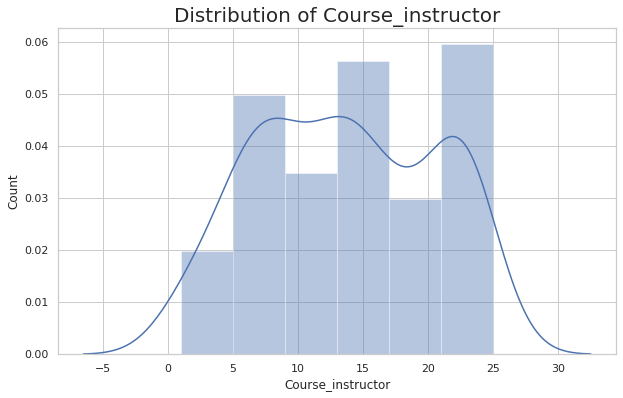

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Course_instructor'])
plt.title('Distribution of Course_instructor', fontsize = 20)
plt.xlabel('Course_instructor')
plt.ylabel('Count')

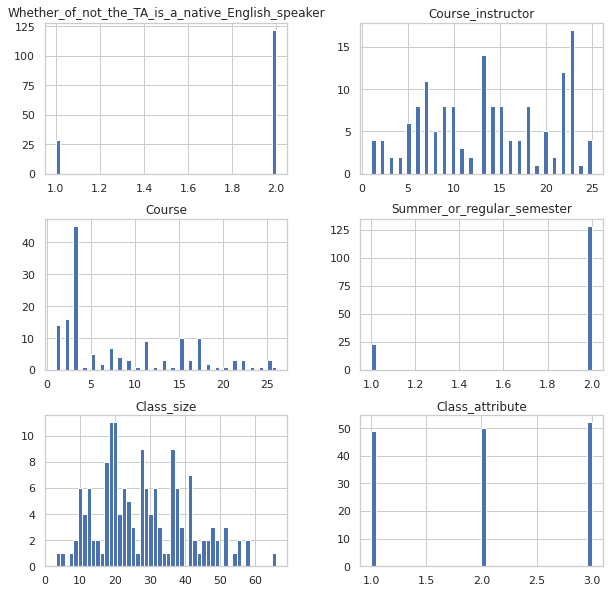

In [ ]:
df.hist(figsize=(10,10),bins=50)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

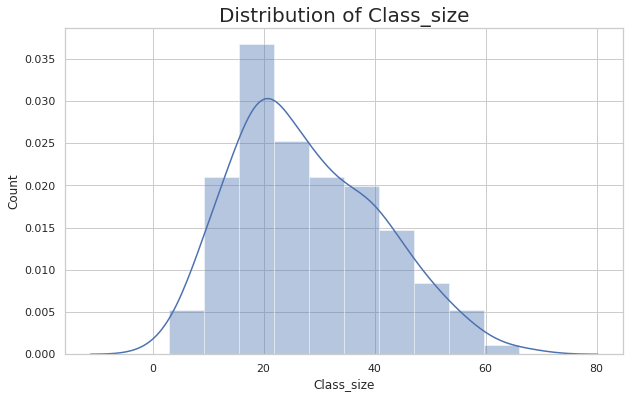

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Class_size'])
plt.title('Distribution of Class_size', fontsize = 20)
plt.xlabel('Class_size')
plt.ylabel('Count')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

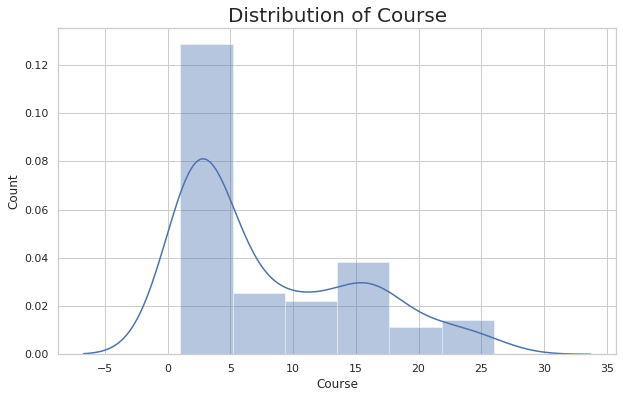

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Course'])
plt.title('Distribution of Course', fontsize = 20)
plt.xlabel('Course')
plt.ylabel('Count')

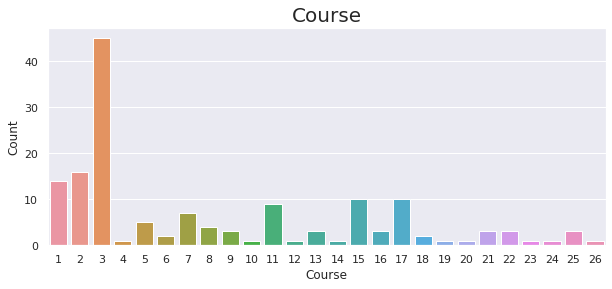

In [ ]:
Course  = df.Course .value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=Course.index, y=Course .values)
plt.title('Course', fontsize = 20)
plt.xlabel('Course')
plt.ylabel('Count')
plt.show()

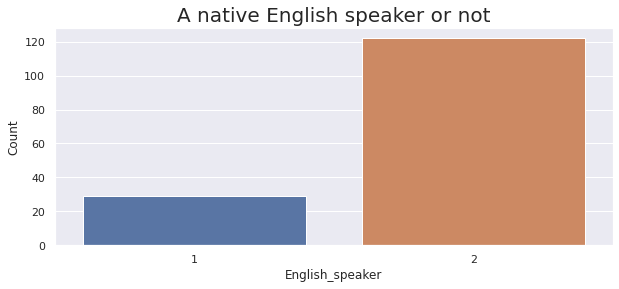

In [ ]:
Course  = df.Whether_of_not_the_TA_is_a_native_English_speaker.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=Course.index, y=Course .values)
plt.title('A native English speaker or not', fontsize = 20)
plt.xlabel('English_speaker')
plt.ylabel('Count')
plt.show()

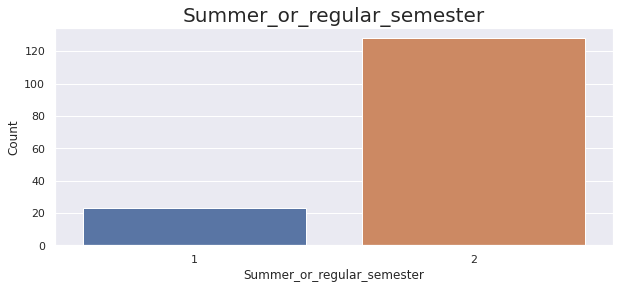

In [ ]:
Course  = df.Summer_or_regular_semester.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=Course.index, y=Course .values)
plt.title('Summer_or_regular_semester', fontsize = 20)
plt.xlabel('Summer_or_regular_semester')

plt.ylabel('Count')
plt.show()

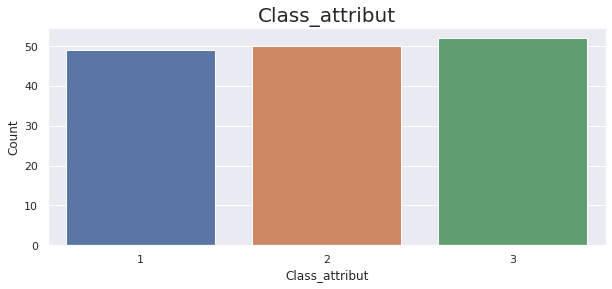

In [ ]:
Course  = df.Class_attribute.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=Course.index, y=Course .values)
plt.title('Class_attribut', fontsize = 20)
plt.xlabel('Class_attribut')
plt.ylabel('Count')
plt.show()

Whether_of_not_the_TA_is_a_native_English_speaker        AxesSubplot(0.125,0.71587;0.168478x0.16413)
Course_instructor                                     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Course                                                AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Summer_or_regular_semester                            AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Class_size                                              AxesSubplot(0.125,0.518913;0.168478x0.16413)
Class_attribute                                      AxesSubplot(0.327174,0.518913;0.168478x0.16413)
dtype: object

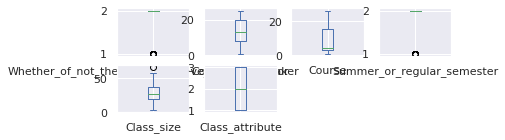

In [ ]:
df.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)

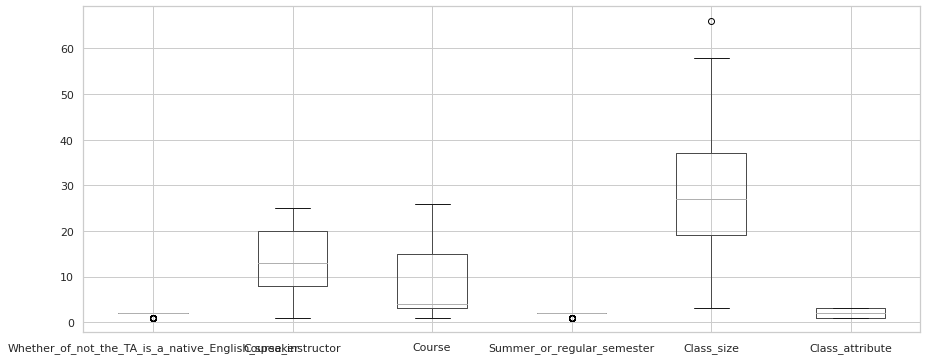

In [ ]:
sns.set(style="whitegrid")
df.boxplot(figsize=(15,6))

In [ ]:
df.corr()

,Whether_of_not_the_TA_is_a_native_English_speaker,Course_instructor,Course,Summer_or_regular_semester,Class_size,Class_attribute
Whether_of_not_the_TA_is_a_native_English_speaker,1.000000,-0.250510,0.134660,0.214417,-0.151547,-0.255466
Course_instructor,-0.250510,1.000000,-0.236010,-0.168573,-0.035765,0.075095
Course,0.134660,-0.236010,1.000000,0.224927,-0.033485,0.143103
Summer_or_regular_semester,0.214417,-0.168573,0.224927,1.000000,0.269554,-0.282742
Class_size,-0.151547,-0.035765,-0.033485,0.269554,1.000000,-0.035676
Class_attribute,-0.255466,0.075095,0.143103,-0.282742,-0.035676,1.000000


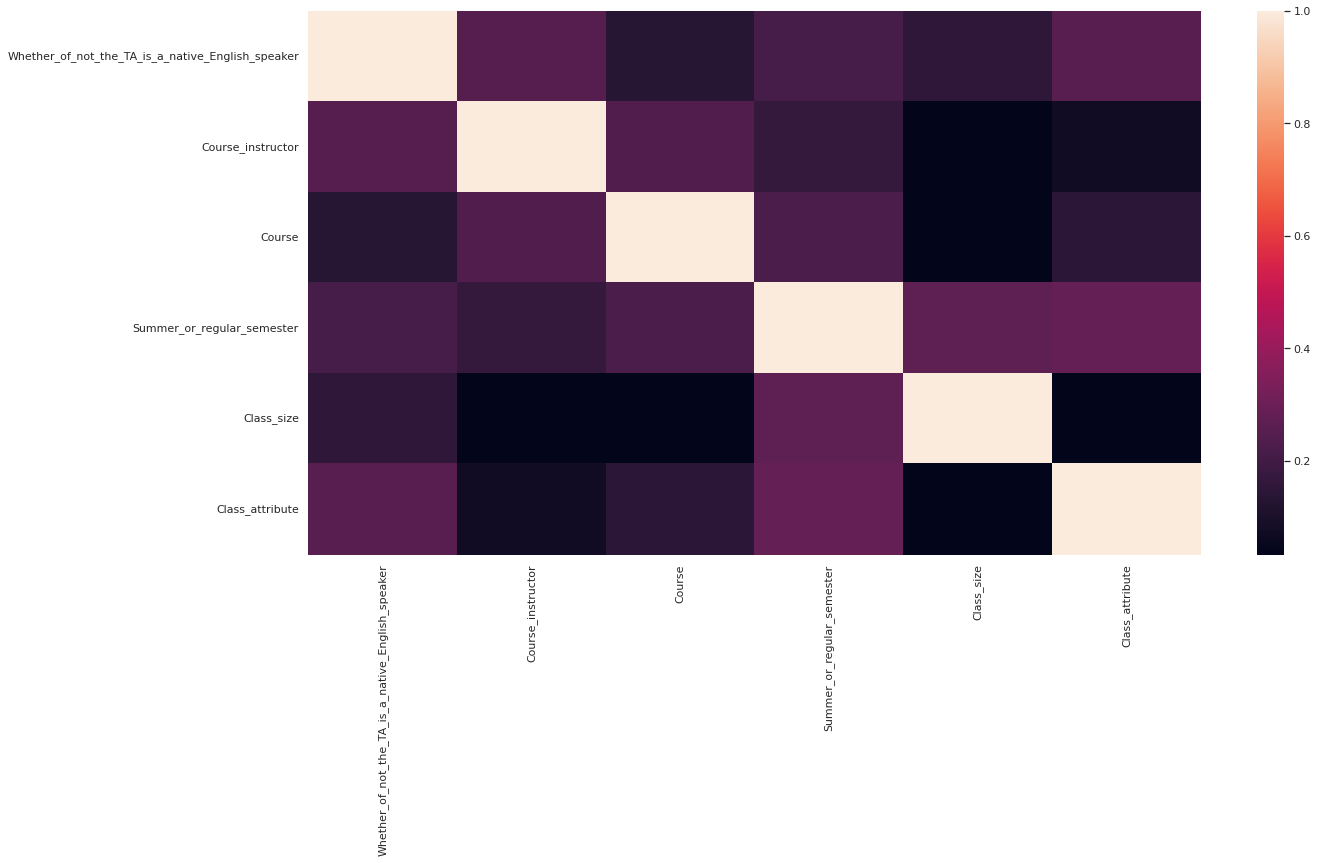

In [ ]:
corr_matrix = df.corr().abs()
plt.figure(figsize=(20,10))
ax = sns.heatmap(corr_matrix)

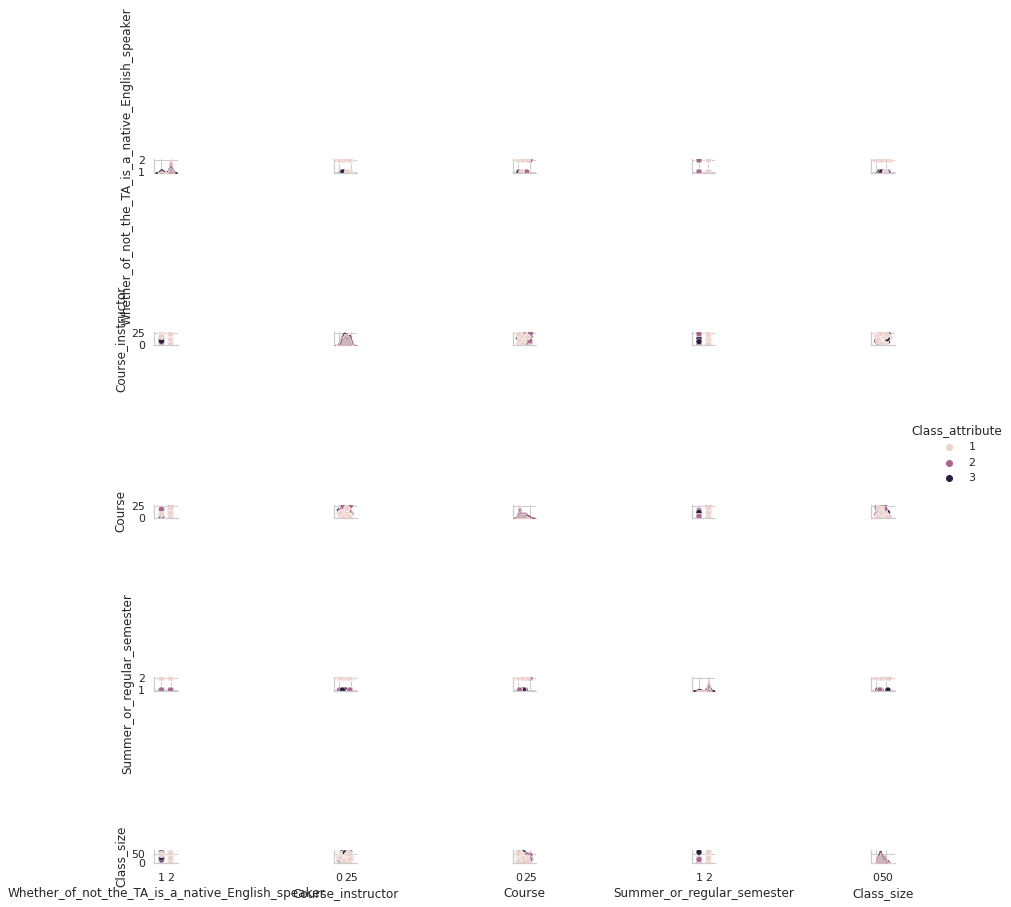

In [ ]:
sns.pairplot(df,hue='Class_attribute');

Declare feature vector and target variable 

In [ ]:
X=df.drop(['Class_attribute'], axis=1)
y=df['Class_attribute']

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
X=scaler.fit_transform(X)

Split data into separate training and test set 

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state= 15,shuffle=True)

Using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear' )
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

s1=lr.score(X_train, y_train)*100
print("train score=",s1)
print("test score=",lr.score(X_test, y_test)*100 )
s11 = lr.score(X_test, y_test)*100 

train score= 51.66666666666667
test score= 58.06451612903226


Using KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3 )
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)


s2=knn.score(X_train, y_train)*100
print("train score=",s2)
s22=knn.score(X_test, y_test)*100
print("test score=",knn.score(X_test, y_test)*100 )
pred_prob1 = knn.predict_proba(X_test)



train score= 71.66666666666667
test score= 54.83870967741935


Using SVC

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
pred_y = svc.predict(X_test)

from sklearn.metrics import accuracy_score
s3=svc.score(X_train, y_train)*100
print("train score=",s3)
s33=svc.score(X_test, y_test)*100
print("test score=",svc.score(X_test, y_test)*100 )


train score= 57.49999999999999
test score= 58.06451612903226


Using Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
dt = DecisionTreeClassifier(criterion='entropy',random_state=30,max_depth=10)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

s4=dt.score(X_train, y_train)*100
print("train score=",s4)
s44=dt.score(X_test, y_test)*100 
print("test score=",dt.score(X_test, y_test)*100 )

pred_prob11 = dt.predict(X_train)
pred_prob1 = dt.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,pred_prob1))



train score= 84.16666666666667
test score= 48.38709677419355
              precision    recall  f1-score   support

           1       0.50      0.38      0.43         8
           2       0.54      0.58      0.56        12
           3       0.42      0.45      0.43        11

    accuracy                           0.48        31
   macro avg       0.49      0.47      0.47        31
weighted avg       0.49      0.48      0.48        31



Using GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred3 = gnb.predict(X_test)

s5=gnb.score(X_train, y_train)*100
print("train score=",s5)
s55=gnb.score(X_test, y_test)*100
print("test score=",gnb.score(X_test, y_test)*100 )
pred_prob1 = gnb.predict_proba(X_test)

train score= 48.333333333333336
test score= 64.51612903225806


Random Forest

In [ ]:
rf_model = RandomForestClassifier( criterion='entropy', random_state=30,max_depth=11, max_features=3)
rf_model.fit(X_train, y_train)
pred_RF = rf_model.predict(X_test)
s6=rf_model.score(X_train, y_train)*100
print("train score=",s6)
s66=rf_model.score(X_test, y_test)*100
print("test score=",rf_model.score(X_test, y_test)*100 )

from sklearn.metrics import classification_report
print(classification_report(y_test,pred_RF))

train score= 95.83333333333334
test score= 83.87096774193549
              precision    recall  f1-score   support

           1       0.78      0.88      0.82         8
           2       1.00      0.75      0.86        12
           3       0.77      0.91      0.83        11

    accuracy                           0.84        31
   macro avg       0.85      0.84      0.84        31
weighted avg       0.86      0.84      0.84        31



Using Xgboost

In [ ]:
import xgboost as xgb
xg = xgb.XGBClassifier(random_state=30)
xg.fit(X_train, y_train)
y_pred5 = xg.predict(X_test)
s7=xg.score(X_train, y_train)*100
print("train score=",s7)
s77=xg.score(X_test, y_test)*100
print("test score=",s77 )
pred_prob1 = xg.predict_proba(X_test)


train score= 86.66666666666667
test score= 70.96774193548387


Results

In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVC','Decision Tree' ,'GaussianNB','Random Forest','Xgboost'],
    'Train_Score': [s1,s2,s3,s4,s5,s6,s7],
    'Test_score': [s11,s22,s33,s44,s55,s66,s77] })

result_df = results.sort_values(by='Train_Score', ascending=False)
#result_df = result_df.set_index('Train_Score')
print(result_df)




                 Model  Train_Score  Test_score
5        Random Forest    95.833333   83.870968
6              Xgboost    86.666667   70.967742
3        Decision Tree    85.833333   58.064516
1                  KNN    71.666667   54.838710
2                  SVC    57.500000   58.064516
0  Logistic Regression    51.666667   58.064516
4           GaussianNB    48.333333   64.516129


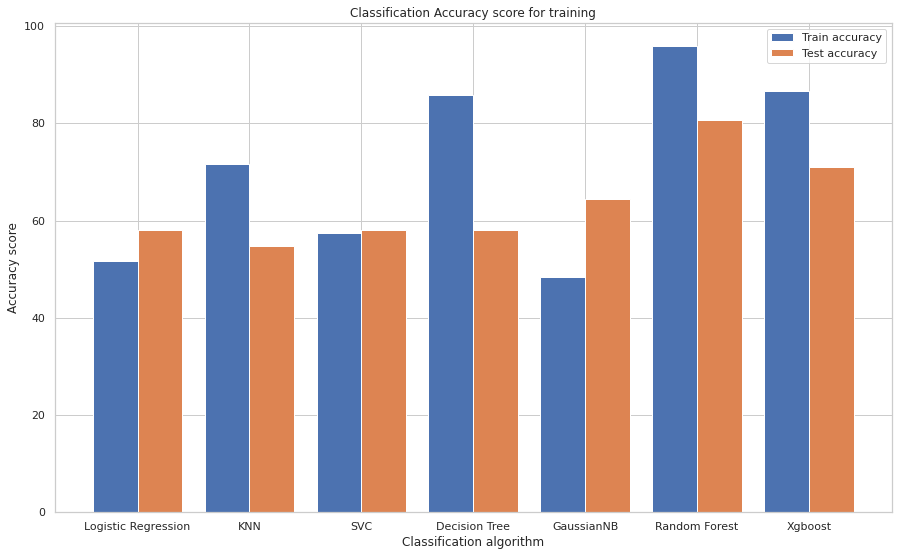

In [ ]:
import matplotlib.pyplot as plt

label_names = ['Logistic Regression','KNN', 'SVC','Decision Tree' ,'GaussianNB','Random Forest','Xgboost']
acc = np.arange(len(label_names))
train = [s1,s2,s3,s4,s5,s6,s7]
test=[s11,s22,s33,s44,s55,s66,s77]
plt.figure(figsize=(15,9))
plt.bar(acc-0.2, train,0.4, align='center',label="Train accuracy")
plt.bar(acc+0.2, test,0.4, align='center',label="Test accuracy")
plt.xticks(acc, label_names)
plt.xlabel('Classification algorithm')
plt.ylabel('Accuracy score')
plt.title('Classification Accuracy score for training')
plt.legend()

plt.show()

Random forest gives better result as compared to other algorithms

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
print("===============     Random Forest     ===============")
print("=====================================================")
print("Train score=",rf_model.score(X_train, y_train)*100)
print("Accuracy Score:",metrics.accuracy_score(y_test, pred_RF)*100)
RF_R=accuracy_score(y_test,pred_RF)
from sklearn.metrics import mean_absolute_error
print("=====================================================")
print("Mean absolute error= ",mean_absolute_error(y_test, pred_RF))
print("=====================================================")
print(classification_report(y_test, pred_RF))








===============     Random Forest     ===============
Train score= 95.83333333333334
Accuracy Score: 83.87096774193549
Mean absolute error=  0.22580645161290322
              precision    recall  f1-score   support

           1       0.78      0.88      0.82         8
           2       1.00      0.75      0.86        12
           3       0.77      0.91      0.83        11

    accuracy                           0.84        31
   macro avg       0.85      0.84      0.84        31
weighted avg       0.86      0.84      0.84        31

